In [3]:
import numpy as np

In [4]:
def promethee_method(matrix, preference_functions, q=0.5):
    matrix = np.array(matrix)
    num_alternatives, num_criteria = matrix.shape
    
    # Calculate the pairwise outranking matrix
    outranking_matrix = np.zeros((num_alternatives, num_alternatives))
    for i in range(num_alternatives):
        for j in range(num_alternatives):
            if i != j:
                outranking_value = 0
                for k in range(num_criteria):
                    diff = matrix[i][k] - matrix[j][k]
                    outranking_value += preference_functions[k](diff)
                outranking_matrix[i][j] = outranking_value
    
    # Calculate the net outranking flow for each alternative
    net_outranking_flow = np.sum(outranking_matrix, axis=1) - np.sum(outranking_matrix, axis=0)
    
    # Calculate the positive and negative outranking flows
    positive_outranking_flow = np.maximum(net_outranking_flow, 0)
    negative_outranking_flow = np.abs(np.minimum(net_outranking_flow, 0))
    
    # Calculate the overall outranking flows
    outranking_flows = positive_outranking_flow - q * negative_outranking_flow
    
    # Rank the alternatives based on their outranking flows
    rankings = np.argsort(outranking_flows)[::-1] + 1  # Adding 1 to get ranks starting from 1
    
    return outranking_flows, rankings

In [8]:
pref_func_linear = lambda x: 1 if x > 0 else 0

def pref_func_linear_1(x):
    if x > 0:
        return 1
    if x <= 0:
        return 0

def pref_func_v_shape(x, threshold=0):
    if x <= -threshold:
        return 0
    elif -threshold < x < threshold:
        return (x + threshold) / (2 * threshold)
    else:
        return 1


def pref_func_usual(x, threshold=0):
    return 1 if x > threshold else 0


preference_functions = [pref_func_linear, pref_func_linear, pref_func_linear] 

In [10]:
matrix = [
    [250, 16, 12],
    [200, 20, 8],
    [300, 15, 10],
    [275, 18, 11]
]

q_value = 0.5
outranking_flows, ranks = promethee_method(matrix, preference_functions, q=q_value)
print("Outranking flows:", outranking_flows)
print("Ranks:", ranks)

Outranking flows: [ 1.  -1.5 -0.5  3. ]
Ranks: [4 1 3 2]


In [ ]:
!pip install feloopy

In [ ]:
from feloopy import *

m1 = madm('promethee_i','promethee_i_model', 'pydecision')

m1.add_dm([
        [8.840, 8.790, 6.430, 6.950],  
        [8.570, 8.510, 5.470, 6.910], 
        [7.760, 7.750, 5.340, 8.760],  
        [7.970, 9.120, 5.930, 8.090],  
        [9.030, 8.970, 8.190, 8.100],  
        [7.410, 7.870, 6.770, 7.230]  
        ])

m1.add_qt([ 0.3,  0.3,  0.3,  0.3])
m1.add_st([ 0.4,  0.4,  0.4,  0.4])
m1.add_pt([ 0.5,  0.5,  0.5,  0.5])
m1.add_wv([9.00, 8.24, 5.98, 8.48])
m1.add_uf(['t5', 't5', 't5', 't5'])

m1.sol(show_graph=False)

m1.report(show_tensors=False)

In [ ]:
m2 = madm('promethee_ii','promethee_ii_model', 'pydecision')

m2.add_dm([
        [8.840, 8.790, 6.430, 6.950],  
        [8.570, 8.510, 5.470, 6.910], 
        [7.760, 7.750, 5.340, 8.760],  
        [7.970, 9.120, 5.930, 8.090],  
        [9.030, 8.970, 8.190, 8.100],  
        [7.410, 7.870, 6.770, 7.230]  
        ])

m2.add_qt([ 0.3,  0.3,  0.3,  0.3])
m2.add_st([ 0.4,  0.4,  0.4,  0.4])
m2.add_pt([ 0.5,  0.5,  0.5,  0.5])
m2.add_wv([9.00, 8.24, 5.98, 8.48])
m2.add_uf(['t5', 't5', 't5', 't5'])

m2.sol(show_graph=False)

m2.report(show_tensors=False)

In [ ]:
!pip install pyDecision

In [4]:
from pyDecision import algorithm

In [21]:
# PROMETHEE I

# Parameters 
Q = [ 0.3,  0.3,  0.3,  0.3] 
S = [ 0.4,  0.4,  0.4,  0.4]
P = [ 0.5,  0.5,  0.5,  0.5]
W = [9.00, 8.24, 5.98, 8.48]
F = ['t5', 't5', 't5', 't5'] # 't1' = Usual; 't2' = U-Shape; 't3' = V-Shape; 't4' = Level; 't5' = V-Shape with Indifference; 't6' = Gaussian; 't7' = C-Form

# Dataset
dataset = np.array([
        [8.840, 8.790, 6.430, 6.950],  #a1
        [8.570, 8.510, 5.470, 6.910],  #a2
        [7.760, 7.750, 5.340, 8.760],  #a3
        [7.970, 9.120, 5.930, 8.090],  #a4
        [9.030, 8.970, 8.190, 8.100],  #a5
        [7.410, 7.870, 6.770, 7.230]   #a6
        ])

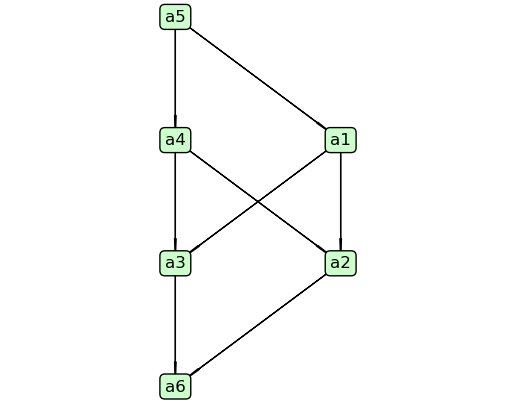

In [22]:
# Call Promethee I
p1 = algorithm.promethee_i(dataset, W = W, Q = Q, S = S, P = P, F = F, graph = True)

a5: 0.657
a1: 0.174
a4: 0.112
a2: -0.174
a3: -0.248
a6: -0.521


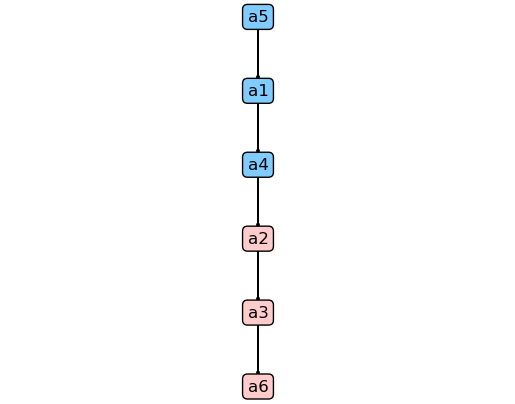

In [24]:
# Call Promethee II
p2 = algorithm.promethee_ii(dataset, W = W, Q = Q, S = S, P = P, F = F, sort = True, topn = 10, graph = True, verbose = True)

In [8]:
import numpy as np

# PROMETHEE V

# Parameters
Q = [ 0.3,  0.3,  0.3,  0.3]
S = [ 0.4,  0.4,  0.4,  0.4]
P = [ 0.5,  0.5,  0.5,  0.5]
W = [9.00, 8.24, 5.98, 8.48]
F = ['t5', 't5', 't5', 't5'] # 't1' = Usual; 't2' = U-Shape; 't3' = V-Shape; 't4' = Level; 't5' = V-Shape with Indifference; 't6' = Gaussian; 't7' = C-Form

# Constraint 1 - Maximum Number of Selected Criteria
criteria = 4

# Constraint 2 - Cost of Each Alternative
cost   = [10, 10, 15, 10, 10, 15]
budget = 50

# Constraint 3 - Forbiden Sets of Selected Alternatives
forbidden = [['a1', 'a4'], ['a1', 'a3']]

# Dataset
dataset = np.array([
        [8.840, 8.790, 6.430, 6.950],  #a1
        [8.570, 8.510, 5.470, 6.910],  #a2
        [7.760, 7.750, 5.340, 8.760],  #a3
        [7.970, 9.120, 5.930, 8.090],  #a4
        [9.030, 8.970, 8.190, 8.100],  #a5
        [7.410, 7.870, 6.770, 7.230]   #a6
        ])

In [9]:
# Call Promethee V
p5 = algorithm.promethee_v(dataset, W = W, Q = Q, S = S, P = P, F = F, sort = True, criteria = criteria, cost = cost, budget = budget, forbidden = forbidden, iterations = 1500)

Generation =  0  f(x) =  1.3005448339241175
Generation =  1  f(x) =  1.3005448339241175
Generation =  2  f(x) =  1.2034927866362948
Generation =  3  f(x) =  1.0606263383297647
Generation =  4  f(x) =  1.0606263383297647
Generation =  5  f(x) =  1.0606263383297647
Generation =  6  f(x) =  1.0606263383297647
Generation =  7  f(x) =  1.0606263383297647
Generation =  8  f(x) =  1.0606263383297647
Generation =  9  f(x) =  1.0606263383297647
Generation =  10  f(x) =  1.0606263383297647
Generation =  11  f(x) =  1.0606263383297647
Generation =  12  f(x) =  1.0606263383297647
Generation =  13  f(x) =  1.0606263383297647
Generation =  14  f(x) =  1.0606263383297647
Generation =  15  f(x) =  1.0606263383297647
Generation =  16  f(x) =  1.0606263383297647
Generation =  17  f(x) =  1.0606263383297647
Generation =  18  f(x) =  1.0606263383297647
Generation =  19  f(x) =  1.0606263383297647
Generation =  20  f(x) =  1.0606263383297647
Generation =  21  f(x) =  1.0606263383297647
Generation =  22  f(

In [10]:
p5

array([[ 5.        ,  0.65698423,  1.        ],
       [ 1.        ,  0.1739306 ,  1.        ],
       [ 4.        ,  0.11192429,  1.        ],
       [ 2.        , -0.17390536,  0.        ],
       [ 3.        , -0.24750789,  0.        ],
       [ 6.        , -0.52142587,  0.        ]])